In [95]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time

In [96]:
df = pd.read_excel('https://github.com/Zhanarik/Digital-summer/blob/master/dataset.xls?raw=true')#loading data

In [97]:
df['time'] = (pd.to_datetime(df['timestamp'], unit='s')
                     .dt.tz_localize('utc')
                     .dt.tz_convert('Asia/Almaty'))    
df
data = data.drop(columns=['timestamp'], axis=1)
data = df.copy()
data.head()

,IP,Request,User-Agent,Host,Code,timestamp,time
0,38.184.198.219,GET /reset.htm HTTP/1.1,Mozilla/5.0 (X11; Kali Linux i586; rv:31.0) Ge...,www.armaninvest.com,200,1.584324e+09,2020-03-16 08:00:58.654548883+06:00
1,100.16.212.66,GET /zoom.html HTTP/1.1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,www.armaninvest.com,404,1.584326e+09,2020-03-16 08:31:34.689723969+06:00
2,157.1.30.62,GET /zoom.html HTTP/1.1,Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like M...,www.armaninvest.com,404,1.584326e+09,2020-03-16 08:32:43.527138948+06:00
3,81.251.197.246,GET /zoom.html HTTP/1.1,Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like M...,www.armaninvest.com,404,1.584326e+09,2020-03-16 08:35:25.517041922+06:00
4,35.195.6.20,GET /zoom.html HTTP/1.1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,www.armaninvest.com,404,1.584326e+09,2020-03-16 08:35:27.251421928+06:00


In [98]:
df.groupby(['IP','Request']).count()

User-Agent  Host  \
IP             Request                                                        
100.16.212.66  GET /tasks/inkarabutalipovna.html HTTP/1.1          44    44   
               GET /zoom.html HTTP/1.1                             22    22   
               PUT /otchety/ FTP                                   22    22   
12.46.186.232  GET /tasks/aizaisaakova.html HTTP/1.1               66    66   
               GET /zoom.html HTTP/1.1                             22    22   
...                                                               ...   ...   
76.232.209.1   PUT /otchety/ FTP                                   66    66   
81.251.197.246 GET /tasks/azatultarakov.html HTTP/1.1             154   154   
               GET /zoom.html HTTP/1.1                             22    22   
               PUT /otchety/ FTP                                  154   154   
96.92.33.9     GET /reset.htm HTTP/1.1                              1     1   

                                                           Code  timestamp  \
IP             Request                                                       
100.16.212.66  GET /tasks/inkarabutalipovna.html HTTP/1.1    44         44   
               GET /zoom.html HTTP/1.1                       22         22   
               PUT /otchety/ FTP                             22         22   
12.46.186.232  GET /tasks/aizaisaakova.html HTTP/1.1         66         66   
               GET /zoom.html HTTP/1.1                       22         22   
...                                                         ...        ...   
76.232.209.1   PUT /otchety/ FTP                             66         66   
81.251.197.246 GET /tasks/azatultarakov.html HTTP/1.1       154        154   
               GET /zoom.html HTTP/1.1                       22         22   
               PUT /otchety/ FTP                            154        154   
96.92.33.9     GET /reset.htm HTTP/1.1                        1          1   

                                                           time  
IP             Request                                           
100.16.212.66  GET /tasks/inkarabutalipovna.html HTTP/1.1    44  
               GET /zoom.html HTTP/1.1                       22  
               PUT /otchety/ FTP                             22  
12.46.186.232  GET /tasks/aizaisaakova.html HTTP/1.1         66  
               GET /zoom.html HTTP/1.1                       22  
...                                                         ...  
76.232.209.1   PUT /otchety/ FTP                             66  
81.251.197.246 GET /tasks/azatultarakov.html HTTP/1.1       154  
               GET /zoom.html HTTP/1.1                       22  
               PUT /otchety/ FTP                            154  
96.92.33.9     GET /reset.htm HTTP/1.1                        1  

[81 rows x 5 columns]

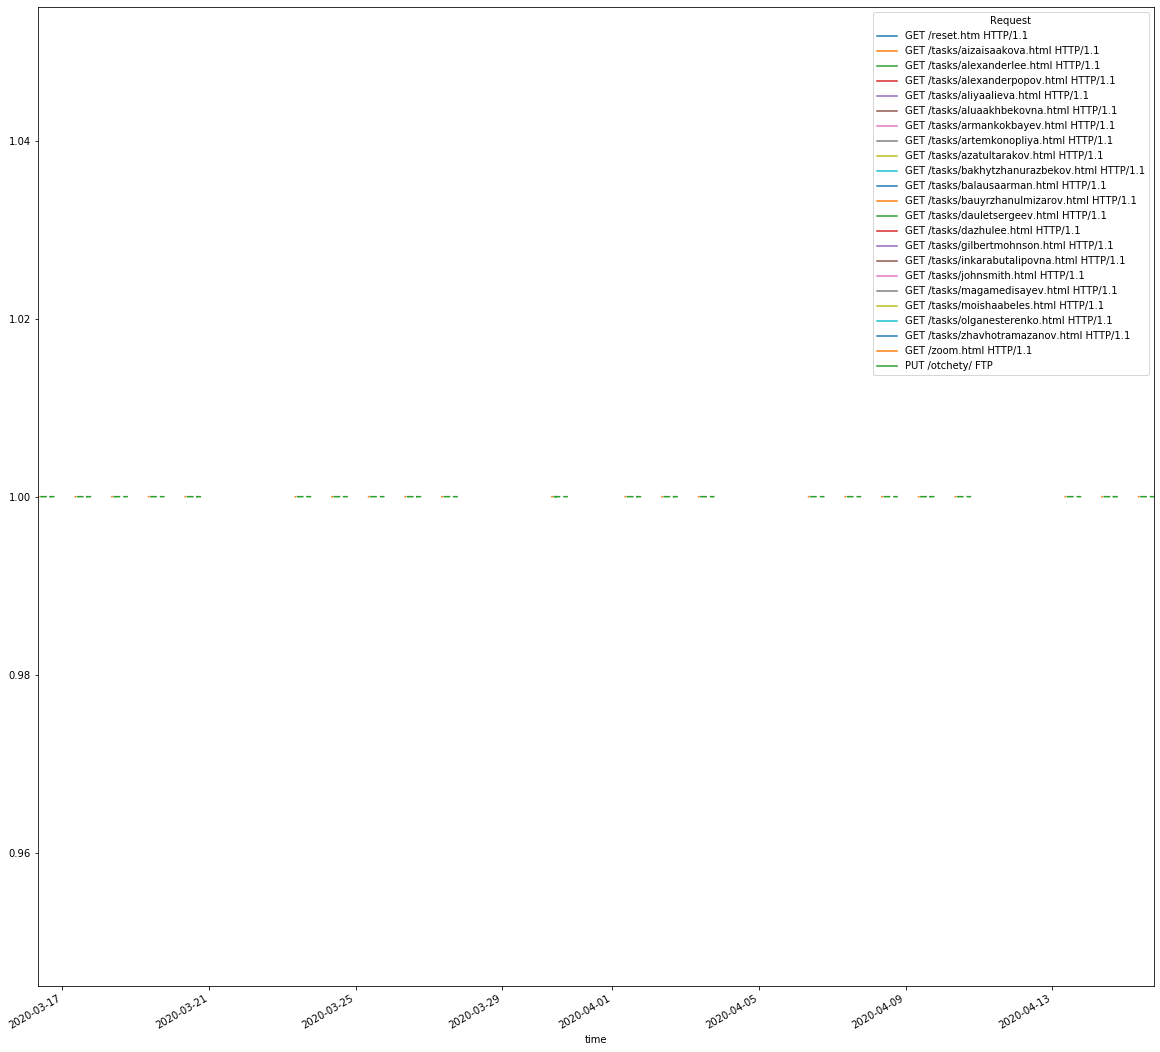

In [99]:
fig, ax = plt.subplots(figsize=(20,20))
data.groupby(['time','Request']).count()['Code'].unstack().plot(ax=ax)

In [100]:
df = pd.read_excel('https://github.com/Zhanarik/Digital-summer/blob/master/one%20week%20dataset.xlsx?raw=true')#loading data

In [101]:
df['time'] = (pd.to_datetime(df['timestamp'], unit='s')
                     .dt.tz_localize('utc')
                     .dt.tz_convert('Asia/Almaty'))    
df
data = data.drop(columns=['timestamp'], axis=1)
data = df.copy()
data.head()

,IP,Request,User-Agent,Host,Code,timestamp,time
0,39.8.158.79,GET /tasks/dazhulee.html HTTP/1.1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,www.armaninvest.com,200,1586236972,2020-04-07 11:22:52+06:00
1,229.92.5.149,GET /tasks/dauletsergeev.html HTTP/1.1,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6...,www.armaninvest.com,200,1586237141,2020-04-07 11:25:41+06:00
2,76.232.209.1,GET /tasks/gilbertmohnson.html HTTP/1.1,Mozilla/5.0 (Linux; Android 8.0.0;) AppleWebKi...,www.armaninvest.com,200,1586237143,2020-04-07 11:25:43+06:00
3,209.2.206.150,GET /tasks/bakhytzhanurazbekov.html HTTP/1.1,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,www.armaninvest.com,200,1586237157,2020-04-07 11:25:57+06:00
4,174.30.97.151,GET /tasks/armankokbayev.html HTTP/1.1,Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like M...,www.armaninvest.com,200,1586237242,2020-04-07 11:27:22+06:00


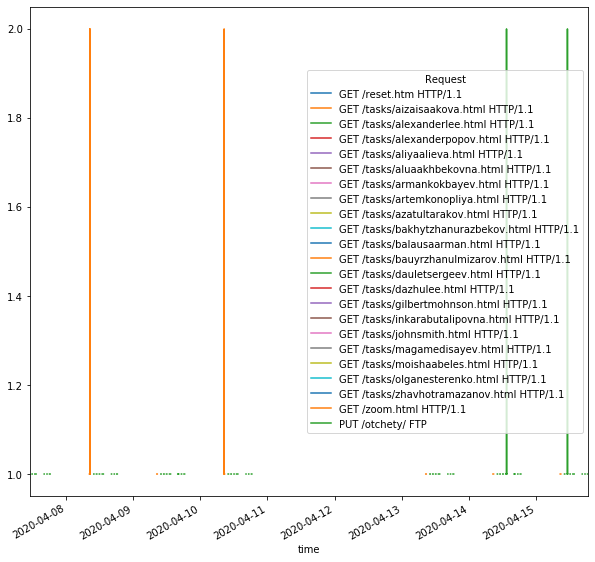

In [102]:
fig, ax = plt.subplots(figsize=(10,10))
data.groupby(['time','Request']).count()['Code'].unstack().plot(ax=ax)

In [103]:
df.groupby(['time','Request']).count()

,,IP,User-Agent,Host,Code,timestamp
time,Request,,,,,
2020-04-07 11:22:52+06:00,GET /tasks/dazhulee.html HTTP/1.1,1,1,1,1,1
2020-04-07 11:25:41+06:00,GET /tasks/dauletsergeev.html HTTP/1.1,1,1,1,1,1
2020-04-07 11:25:43+06:00,GET /tasks/gilbertmohnson.html HTTP/1.1,1,1,1,1,1
2020-04-07 11:25:57+06:00,GET /tasks/bakhytzhanurazbekov.html HTTP/1.1,1,1,1,1,1
2020-04-07 11:27:22+06:00,GET /tasks/armankokbayev.html HTTP/1.1,1,1,1,1,1
...,...,...,...,...,...,...
2020-04-15 18:27:25+06:00,PUT /otchety/ FTP,1,1,1,1,1
2020-04-15 18:28:07+06:00,PUT /otchety/ FTP,1,1,1,1,1
2020-04-15 18:28:13+06:00,PUT /otchety/ FTP,1,1,1,1,1
